In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel(r'E:\proj2\myenv\myproj\Dataset\careeredit.xlsx')
data

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,Professional,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
1,Professional,Poor,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
2,Professional,Beginner,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
3,Professional,Average,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
4,Professional,Intermediate,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9174,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Poor,Poor,Professional,Graphics Designer
9175,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Beginner,Beginner,Professional,Graphics Designer
9176,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Average,Average,Professional,Graphics Designer
9177,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Intermediate,Intermediate,Professional,Graphics Designer


In [4]:
data.isna().sum()

Database Fundamentals              0
Computer Architecture              0
Distributed Computing Systems      0
Cyber Security                     0
Networking                         0
Software Development               0
Programming Skills                 0
Project Management                 0
Computer Forensics Fundamentals    0
Technical Communication            0
AI ML                              0
Software Engineering               0
Business Analysis                  0
Communication skills               0
Data Science                       0
Troubleshooting skills             0
Graphics Designing                 1
Role                               0
dtype: int64

In [5]:
data.describe()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
count,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9178,9179
unique,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,17
top,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Cyber Security Specialist
freq,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,547


In [6]:
data.dtypes

Database Fundamentals              object
Computer Architecture              object
Distributed Computing Systems      object
Cyber Security                     object
Networking                         object
Software Development               object
Programming Skills                 object
Project Management                 object
Computer Forensics Fundamentals    object
Technical Communication            object
AI ML                              object
Software Engineering               object
Business Analysis                  object
Communication skills               object
Data Science                       object
Troubleshooting skills             object
Graphics Designing                 object
Role                               object
dtype: object

In [7]:
for i in data.columns:
    print(i,data[i].unique(),'\n unique_values_count--',data[i].nunique(),'\n')

Database Fundamentals ['Professional' 'Not Interested' 'Poor' 'Beginner' 'Average'
 'Intermediate' 'Excellent'] 
 unique_values_count-- 7 

Computer Architecture ['Not Interested' 'Poor' 'Beginner' 'Average' 'Intermediate' 'Excellent'
 'Professional'] 
 unique_values_count-- 7 

Distributed Computing Systems ['Not Interested' 'Poor' 'Beginner' 'Average' 'Intermediate' 'Excellent'
 'Professional'] 
 unique_values_count-- 7 

Cyber Security ['Not Interested' 'Poor' 'Beginner' 'Average' 'Intermediate' 'Excellent'
 'Professional'] 
 unique_values_count-- 7 

Networking ['Not Interested' 'Poor' 'Beginner' 'Average' 'Intermediate' 'Excellent'
 'Professional'] 
 unique_values_count-- 7 

Software Development ['Not Interested' 'Poor' 'Beginner' 'Average' 'Intermediate' 'Excellent'
 'Professional'] 
 unique_values_count-- 7 

Programming Skills ['Not Interested' 'Poor' 'Beginner' 'Average' 'Intermediate' 'Excellent'
 'Professional'] 
 unique_values_count-- 7 

Project Management ['Not Intereste

In [8]:
data['Graphics Designing']=data['Graphics Designing'].fillna('Average')

In [9]:
cols=['Database Fundamentals', 'Computer Architecture',
       'Distributed Computing Systems', 'Cyber Security', 'Networking',
       'Software Development', 'Programming Skills', 'Project Management',
       'Computer Forensics Fundamentals', 'Technical Communication', 'AI ML',
       'Software Engineering', 'Business Analysis', 'Communication skills',
       'Data Science', 'Troubleshooting skills', 'Graphics Designing']
for i in cols:
    data[i]=data[i].replace(['Not Interested','Poor','Beginner','Average','Intermediate','Excellent','Professional'],[0,1,2,3,4,5,6])

In [10]:
data

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator
1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator
2,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator
3,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator
4,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Database Administrator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,Graphics Designer
9175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,6,Graphics Designer
9176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,6,Graphics Designer
9177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,6,Graphics Designer


In [11]:
x=data.drop('Role',axis=1)
y=data['Role']

In [12]:
for i in data.columns:
    print(i,data[i].unique())

Database Fundamentals [6 0 1 2 3 4 5]
Computer Architecture [0 1 2 3 4 5 6]
Distributed Computing Systems [0 1 2 3 4 5 6]
Cyber Security [0 1 2 3 4 5 6]
Networking [0 1 2 3 4 5 6]
Software Development [0 1 2 3 4 5 6]
Programming Skills [0 1 2 3 4 5 6]
Project Management [0 1 2 3 4 5 6]
Computer Forensics Fundamentals [0 1 2 3 4 5 6]
Technical Communication [0 1 2 3 4 5 6]
AI ML [0 1 2 3 4 5 6]
Software Engineering [0 1 2 3 4 5 6]
Business Analysis [0 1 2 3 4 5 6]
Communication skills [0 1 2 3 4 5 6]
Data Science [0 1 2 3 4 5 6]
Troubleshooting skills [0 1 2 3 4 5 6]
Graphics Designing [0 1 2 3 4 5 6]
Role ['Database Administrator' 'Hardware Engineer'
 'Application Support Engineer' 'Cyber Security Specialist'
 'Networking Engineer' 'Software Developer' 'API Specialist'
 'Project Manager' 'Information Security Specialist' 'Technical Writer'
 'AI ML Specialist' 'Software tester' 'Business Analyst'
 'Customer Service Executive' 'Data Scientist' 'Helpdesk Engineer'
 'Graphics Designer']


In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=.25)

In [14]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
model.score(X_test,y_test)

0.9934640522875817

In [16]:
a=[6,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
b=[4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6]
c=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
d=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [17]:
model.predict([a]),model.predict([b]),model.predict([c]),model.predict([d])

(array(['Database Administrator'], dtype=object),
 array(['Graphics Designer'], dtype=object),
 array(['Technical Writer'], dtype=object),
 array(['Technical Writer'], dtype=object))

In [18]:
y_pred=model.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

                                 precision    recall  f1-score   support

               AI ML Specialist       1.00      1.00      1.00       158
                 API Specialist       1.00      1.00      1.00       143
   Application Support Engineer       0.98      0.98      0.98       131
               Business Analyst       1.00      1.00      1.00       123
     Customer Service Executive       1.00      1.00      1.00       119
      Cyber Security Specialist       0.99      0.99      0.99       139
                 Data Scientist       1.00      1.00      1.00       138
         Database Administrator       0.97      0.94      0.96       125
              Graphics Designer       1.00      1.00      1.00       133
              Hardware Engineer       0.95      0.97      0.96       136
              Helpdesk Engineer       1.00      1.00      1.00       133
Information Security Specialist       1.00      1.00      1.00       130
            Networking Engineer       1.00      1.

In [20]:
print(confusion_matrix(y_test,y_pred))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 129   0   0   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 123   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 119   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0 137   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 138   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 118   0   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 133   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0 132   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 133   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 130   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 135   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 154   0   0   0]
 [  0 

<Axes: >

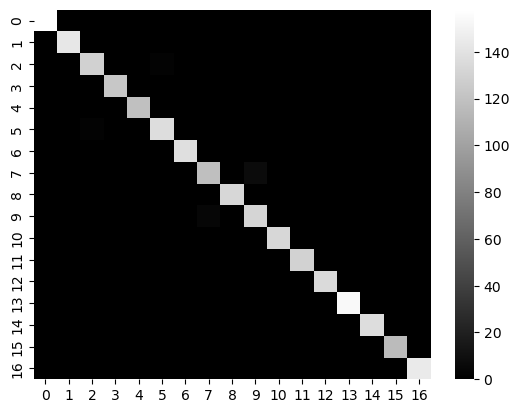

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='gray')

In [22]:
from joblib import dump

In [24]:
dump(model,r'C:\Users\user\Desktop\ml_project\myenv\myproject\model\model.joblib')

['C:\\Users\\user\\Desktop\\ml_project\\myenv\\myproject\\model\\model.joblib']